# Logistic Regression

## EDA

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading data

In [2]:
df = pd.read_csv("data_3_1_1.csv")

In [3]:
df.head()

,x1,x2,class
0,6.70,6.79,1
1,6.92,3.87,1
2,7.87,5.36,1
3,2.93,6.91,0
4,6.67,4.92,1


### Split Data and Scale X

In [4]:
df = df.to_numpy()
X = df[:, :-1]
y = df[:, -1].reshape(-1, 1)

In [5]:
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [6]:
X_scaled[:5]

array([[ 0.89427341,  0.50441425],
       [ 1.00118579, -1.50690571],
       [ 1.46285286, -0.48058148],
       [-0.93781591,  0.58707123],
       [ 0.87969445, -0.78365709]])

### Visualizing Data

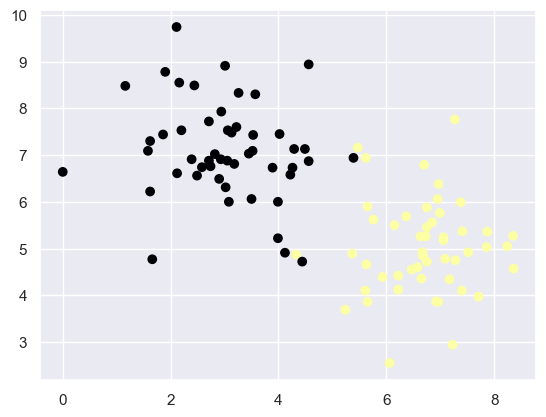

In [7]:
plt.scatter(x=df[:, 0], y=df[:, 1], c=y, cmap='inferno')
plt.show()

## Model Building

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hyp(X, theta):
    return sigmoid(np.dot(X, theta))

def cost(X, y, theta):
    h = hyp(X, theta)
    return -np.mean(y*np.log(h) + (1-y)*np.log(1-h))

def grad(X, y, theta):
    h = hyp(X, theta)
    return np.dot(X.T, h-y) / len(y)

In [9]:
X_new = np.concatenate((np.ones((len(X_scaled), 1)), X_scaled), axis=1)
X_new[:5]

array([[ 1.        ,  0.89427341,  0.50441425],
       [ 1.        ,  1.00118579, -1.50690571],
       [ 1.        ,  1.46285286, -0.48058148],
       [ 1.        , -0.93781591,  0.58707123],
       [ 1.        ,  0.87969445, -0.78365709]])

### Training

In [10]:
theta = np.zeros((3, 1))
epochs = 1000
lr = 1

cost_list = []
for epoch in range(epochs):
    h = hyp(X_new, theta)
    cost_ = cost(X_new, y, theta)
    grad_ = grad(X_new, y, theta)
    theta -= lr*grad_
    cost_list.append(cost_)
    
    if epoch % 50 ==0:
        print(f"Epoch: {epoch+1:03n}, Cost: {cost_:.4f}")

Epoch: 001, Cost: 0.6931
Epoch: 051, Cost: 0.0802
Epoch: 101, Cost: 0.0634
Epoch: 151, Cost: 0.0563
Epoch: 201, Cost: 0.0524
Epoch: 251, Cost: 0.0498
Epoch: 301, Cost: 0.0479
Epoch: 351, Cost: 0.0466
Epoch: 401, Cost: 0.0455
Epoch: 451, Cost: 0.0447
Epoch: 501, Cost: 0.0440
Epoch: 551, Cost: 0.0434
Epoch: 601, Cost: 0.0429
Epoch: 651, Cost: 0.0425
Epoch: 701, Cost: 0.0421
Epoch: 751, Cost: 0.0418
Epoch: 801, Cost: 0.0415
Epoch: 851, Cost: 0.0413
Epoch: 901, Cost: 0.0411
Epoch: 951, Cost: 0.0409


### Visualizing Cost

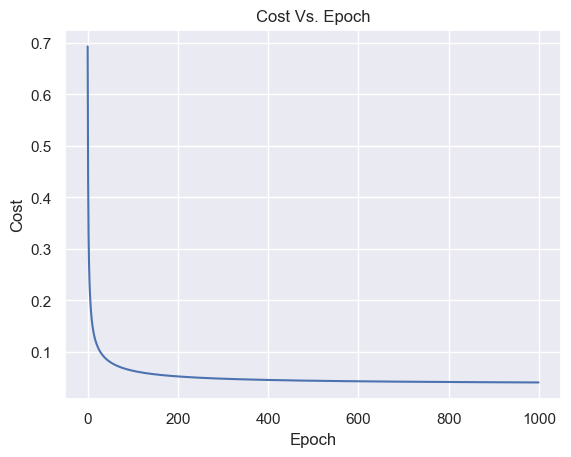

In [11]:
plt.plot(cost_list)
plt.title("Cost Vs. Epoch")
plt.xlabel('Epoch')
plt.ylabel("Cost")
plt.show()

## Model Evaluation

In [12]:
h = hyp(X_new, theta)
y_hat = np.zeros((len(y), 1))
y_hat[h>=0.5] = 1
print(f"Accuracy: {np.mean(y_hat==y)*100:.2f}%")

Accuracy: 98.00%


### Visualizing Boundary Line

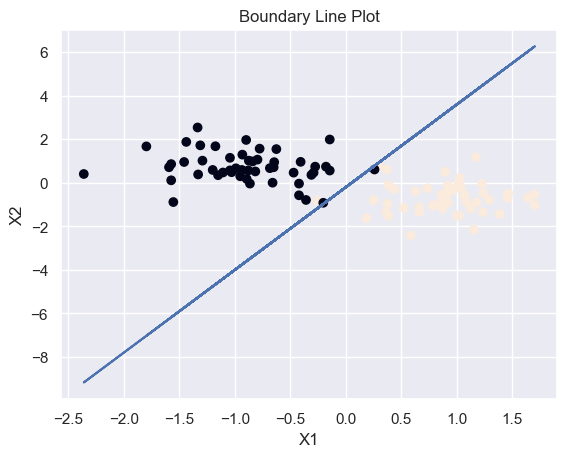

In [13]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
plt.plot(X_new[:, 1], -(theta[0] + theta[1]*X_new[:, 1]) / theta[2])

plt.xlabel('X1')
plt.ylabel("X2")
plt.title("Boundary Line Plot")
plt.show()